##### Nota. Para no abrumar a los oyentes se ha recortado parte del còdigo a continuaciòn. 

In [1]:
import pandas as pd
import telma
import numpy as np 
import matplotlib.pyplot as plt

### Antecedentes y motivaciòn 
**A continuaciòn explica la motivaciòn de la propuesta.**<br>

En el 2018 **Santolino y Macias** pretendieron analizar las **<font color='green' >diferencias </font>**, siempre que éstas existieran, <br>
entre las **<font color='navy' > primas </font>** estimadas en seguros de vida y mixtos **<font color='orange' >utilizando </font>** las tablas de
mortalidad/supervivencia<br> **<font color='red' >(PERM2000/PASEM2010) </font>** con las primas estimadas basadas las tablas de mortalidad creadas <br>a través
de las predicciones realizadas por el modelo Lee-Carter **<font color='red' >(LC)</font>** y el modelo Renshaw-Haberman **<font color='navy' >(RH)</font>**.

En los escenarios propuestos se observò que: 
* Las **primas** calculadas mediante las tablas de mortalidad **PASEM 2010 son superiores** a
las basadas <br>en los modelos Lee-Carter y Renshaw-Haberman.

* Sin embargo, **NO** ocurre lo mismo cuando se utilizan las tablas de supervivencia **PERMF2000P**

De hecho se llegò a las dos siguiente conclusiones:
1. **Una primera conclusión** es que las tablas **PASEM 2010** parecieran **adecuadas** para garantizar<br> la solvencia de las entidades aseguradoras en cuanto a posibles desviaciones en el riesgo de fallecimiento.
<br>

2. **Una segunda conclusión** fue que, en cambio, el riesgo de **longevidad** parecería **NO** quedar <br>completamente **cubierto** con la utilización de las tasas brutas de las tablas **PERM-F 2000P**.

### Objetivo del equipo
* **Llevar a cabo un estudio similar al de Santolino y Macias (2018) CONSIDERANDO las nuevas tablas 2020.**
<br> 
* **Ver que implicaciones tiene este anàlisis en relaciòn a las provisiones y SCR para la proposiciòn de un DASHBOARD.**

### Datos utilizados
Para el desarrollo de la propuesta se usaron los datos del *Human Mortality DataBase* (HMDB).

<br>
Sin embargo, para el estudio aquì realizado ha considerarse lo siguiente:

1. En el ajuste de los modelos consideramos el **periodo 1980-2019.**
2. Puesto que las tablas de mortalidad/supervivencia las queremos generar para hombres <br>entre los 60 y los 110 años, nos centraremos en esta franja de edades para la estimación de los modelos.<br> Es decir el proposito serà preveer las **$q_x$** desde los **60-110**.

Mostramos la siguiente matriz que muestras las $q_x$ por generaciòn de donde:
* Las **filas** son las $x$ o sea las edades.
* Las **columnas** son los años, o sea las cohortes.

In [2]:
percurso = r'C:\Users\Josè Valencia\Documents\HomeESP.csv'
hombres = pd.read_csv(percurso, index_col=0)
hombres

,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.189250,0.195791,0.217088,0.213643,0.164721,0.175357,0.177379,0.179737,0.168381,0.180919,...,0.003230,0.003177,0.002778,0.003021,0.002841,0.003002,0.002916,0.002757,0.002836,0.002704
1,0.086348,0.082058,0.085135,0.109121,0.075081,0.077013,0.073000,0.075382,0.069973,0.073604,...,0.000279,0.000249,0.000204,0.000243,0.000213,0.000291,0.000241,0.000230,0.000225,0.000225
2,0.045458,0.043256,0.042170,0.048791,0.045289,0.043795,0.038201,0.037004,0.037397,0.037716,...,0.000179,0.000148,0.000162,0.000159,0.000150,0.000113,0.000149,0.000132,0.000151,0.000123
3,0.025782,0.024846,0.023706,0.024457,0.023505,0.027321,0.024492,0.021993,0.020549,0.022048,...,0.000140,0.000114,0.000116,0.000105,0.000104,0.000070,0.000117,0.000125,0.000090,0.000121
4,0.016578,0.016483,0.014979,0.016204,0.014925,0.016311,0.017630,0.015668,0.014072,0.014498,...,0.000089,0.000114,0.000111,0.000085,0.000057,0.000100,0.000070,0.000138,0.000110,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.445378,0.000000,2.478873,0.755396,0.960725,0.717131,2.074766,0.000000,1.256125,2.559242,...,0.693056,1.096243,0.545938,0.621521,0.779621,0.708717,0.905842,0.549116,0.894012,0.624507
107,6.000000,NaN,6.000000,NaN,6.000000,0.756522,2.462264,NaN,6.000000,6.000000,...,0.313051,1.058334,0.969229,0.856516,0.857110,0.474619,0.814282,0.327568,1.035528,0.809937
108,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,...,0.422167,0.546714,0.000000,0.844427,0.348752,0.946928,0.747917,0.430985,1.115945,0.375765
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.031943,5.662970,1.335590,1.164366,0.960840,0.836176,1.135613,0.493257,0.000000,0.946609


**Para dar la intuiciòn de la evidente mejora observamos el siguiente gràfico.**
* Colores rojo-verde cohorte màs antiguas.
* Colores pùrpura cohortes màs recientes.<br>

La **mejora en la mortalidad** es evidente sobretodo en las edades màs **jòvenes** con relativa mejora entre los 80-100.
<br>Se nota ademàs una evidente **variabilidad** en estas tasas en la edades màs **longevas.**

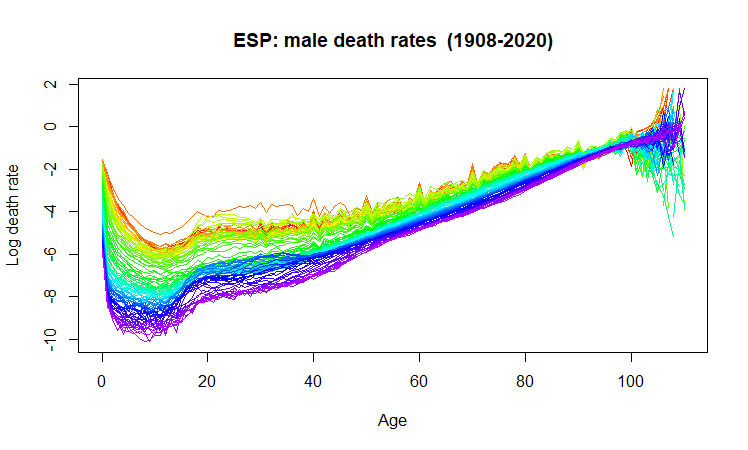

### Modelos LC -RH

$$LC$$  

$$log_{(m_x)} = \alpha_x + \beta^{(1)}_x \cdot{\kappa_t}$$.



$$RH$$   $$log_{(m_x)} = \alpha_x + \beta^{(1)}_x \cdot{\kappa_t}+ \beta^{(0)}_x \cdot{\gamma_{t-x}}$$.

<br>
El Modelo RH es una generalizacin del LC, por ende comparte los parametros pero ademàs añade el efecto de la cohorte.

##### Residos Modelo LC

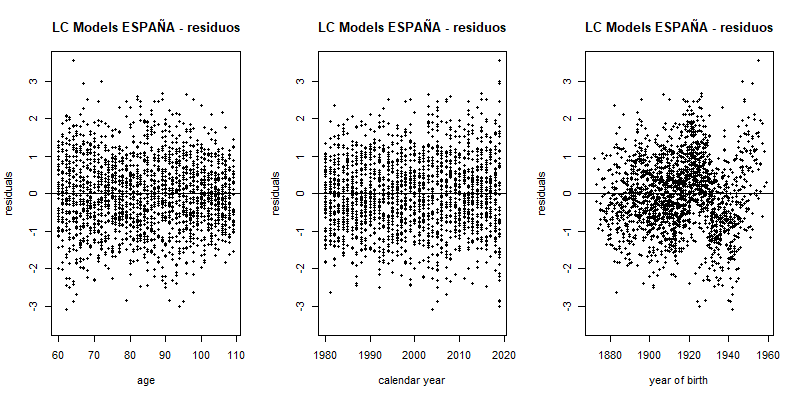

##### Deberiamos observar un comportamiento aleatorio para concluir que se ha adecuademente ajustado el modelo. Sin embargo, :
* Los residuos concerniente *year of birth* presentan una tendencia cuadràtica en el caso LC.
* Los residuos concerniente *year of birth* presentan una tendencia aleatoria y **NO** presentan *heteroscedaticidad*, ni *tendencias* en RH.

##### Residuos Modelo RH

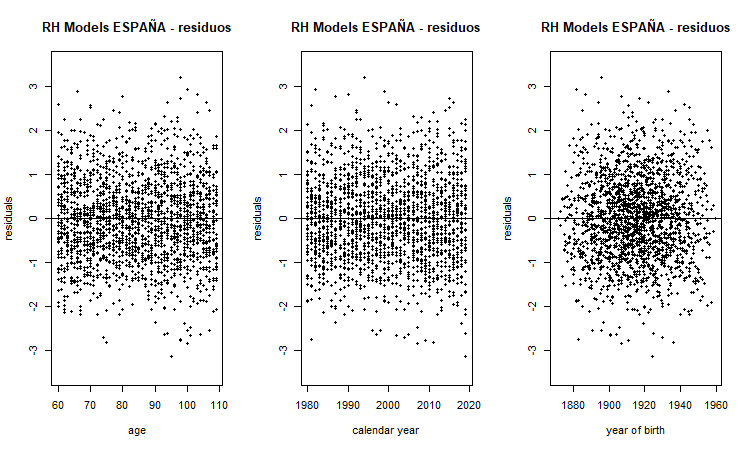

**Cuanto menor mejor**

|Model_Sel|AIC|BIC|
|---|---|---|
|LC| 21657.45  |   22430.03 |
|RH| 20039.07  |   21298.71 |

## Matrices de modelos 
**Mostramos ahora la matrices de hombre y mujeres con los modelos Lee-Carter y Renshaw-Haberman**
* Desde las edades **0-59** son las tasas **observadas** del HMDB.
* Desde las edades **60-104** son las tasas **predecidas** por los modelos.
* Desde las edades **105-110** son tasas **supuestas** por problemas de modelos.?

In [4]:
import glob
p1 = r'C:\Users\Josè Valencia\Desktop\Barcelona Master\Semestre lV\CatedraUBZ'
ficheros = glob.glob(p1 + '/*.csv')

In [13]:
hombres_RH = pd.read_csv(ficheros[2], index_col=0)
hombres_RH

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981
0,0.054852,0.047749,0.047976,0.045806,0.043160,0.040372,0.039427,0.036922,0.034870,0.032335,...,0.025715,0.024743,0.023080,0.020887,0.019653,0.017830,0.016858,0.015641,0.013623,0.013345
1,0.003868,0.003232,0.002883,0.002331,0.002008,0.001772,0.001629,0.001496,0.001513,0.001514,...,0.001476,0.001502,0.001313,0.001343,0.001259,0.001251,0.001301,0.001215,0.001110,0.001040
2,0.002127,0.001877,0.001758,0.001487,0.001347,0.001119,0.001093,0.001160,0.001135,0.001074,...,0.000993,0.001068,0.000973,0.000777,0.000718,0.000771,0.000817,0.000794,0.000803,0.000754
3,0.001376,0.001274,0.001266,0.000990,0.000904,0.000805,0.000799,0.000797,0.000745,0.000821,...,0.000790,0.000703,0.000752,0.000705,0.000581,0.000712,0.000617,0.000706,0.000538,0.000614
4,0.000986,0.001115,0.001086,0.000945,0.000881,0.000867,0.000729,0.000747,0.000746,0.000726,...,0.000675,0.000596,0.000605,0.000643,0.000473,0.000504,0.000503,0.000544,0.000406,0.000437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.138497,0.139475,0.134378,0.134417,0.130237,0.129643,0.126122,0.125106,0.122062,0.120772,...,0.116617,0.114188,0.112623,0.110395,0.108776,0.106705,0.105066,0.103121,0.101485,0.099644
106,0.218495,0.221272,0.214796,0.216131,0.210944,0.211273,0.207006,0.206635,0.203029,0.202176,...,0.197864,0.195081,0.193677,0.191150,0.189601,0.187265,0.185623,0.183432,0.181736,0.179657
107,0.075309,0.074794,0.070956,0.069978,0.066775,0.065522,0.062783,0.061380,0.058991,0.057519,...,0.053913,0.052004,0.050539,0.048802,0.047379,0.045787,0.044418,0.042948,0.041642,0.040279
108,0.012407,0.011973,0.011020,0.010557,0.009776,0.009318,0.008666,0.008228,0.007677,0.007269,...,0.006424,0.006016,0.005678,0.005324,0.005019,0.004710,0.004437,0.004166,0.003923,0.003685


### Comparaciòn modelos LC - RH

Para entender el rol del parametro adicional (efecto de la cohorte) que tiene RH se pone la siguiente condiciòn/responde a la siguiente pregunta.

###### La mortalidad  predicha de las edades 59-90, para los años 1961-1981, es inferior en RH que en LC?

<br>

Ahora para responder se muestra la siguiente matriz lògica de las edades 59-90 de los años 1961-1981 (cohortes). Se observa que:<br>
* La matriz cuenta con una serie de *False*.
* Los *False* son siempre màs nùmerosos conforme avanza el tiempo de calendario.
* Los *True* inicialmente pocos empiezan a llenar la matriz.
* Mayor numero de *True* $\rightarrow $ Mayor frecuencia de $q_x$ inferiores, por parte de **RH** que de **LC**.

Con los cual se concluye que conforme avanza el tiempo, **RH** predice una *mortalidad* **inferior** respecto a **LC**.<br>
Por ende, este modelo al predecir tasas inferiores, soportarìa màs adecuademante el riesgo de *longevidad* para los hombres españoles.

In [64]:
RH = pd.read_csv('MATRICEm_RH_1961_1981.csv', index_col=0)
LC = pd.read_csv('MATRICEm_LC_1961_1982.csv', index_col=0)
(RH < LC.iloc[:, :-1]).iloc[59:90, :]

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
hombres_RH.iloc[55:90, :]

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981
55,0.010587,0.010989,0.010735,0.010760,0.010345,0.010758,0.009721,0.009737,0.010774,0.010052,...,0.009505,0.010040,0.009995,0.010220,0.010601,0.010018,0.009677,0.009682,0.009302,0.009042
56,0.012144,0.012812,0.012360,0.012226,0.011815,0.011945,0.012429,0.011030,0.011256,0.010927,...,0.010861,0.011378,0.011369,0.011633,0.010920,0.011095,0.010283,0.010105,0.010190,0.009669
57,0.012936,0.013509,0.013297,0.012852,0.012302,0.012738,0.012953,0.012099,0.012949,0.011985,...,0.012059,0.012094,0.012215,0.012034,0.012150,0.011825,0.011994,0.011253,0.011026,0.010857
58,0.014935,0.014782,0.014942,0.014671,0.014485,0.013966,0.013780,0.013964,0.015157,0.013730,...,0.013651,0.013802,0.013223,0.013888,0.013355,0.012981,0.012861,0.012808,0.011908,0.012008
59,0.015137,0.016701,0.017395,0.016376,0.015589,0.015867,0.015102,0.015744,0.016300,0.014808,...,0.014369,0.014839,0.014696,0.014979,0.014960,0.014785,0.014368,0.013385,0.013751,0.013014
60,0.007743,0.007949,0.007783,0.007933,0.007815,0.007924,0.007840,0.007920,0.007862,0.007920,...,0.007923,0.007895,0.007928,0.007910,0.007935,0.007923,0.007942,0.007935,0.007950,0.007946
61,0.008059,0.008265,0.008086,0.008233,0.008104,0.008209,0.008115,0.008191,0.008123,0.008176,...,0.008164,0.008128,0.008154,0.008128,0.008146,0.008126,0.008139,0.008124,0.008132,0.008121
62,0.008502,0.008713,0.008517,0.008667,0.008524,0.008628,0.008523,0.008596,0.008518,0.008567,...,0.008542,0.008498,0.008519,0.008485,0.008498,0.008471,0.008478,0.008456,0.008458,0.008440
63,0.009002,0.009218,0.009003,0.009153,0.008994,0.009097,0.008979,0.009047,0.008958,0.009002,...,0.008960,0.008906,0.008921,0.008877,0.008883,0.008847,0.008847,0.008816,0.008811,0.008785
64,0.009453,0.009669,0.009433,0.009580,0.009403,0.009500,0.009366,0.009427,0.009324,0.009359,...,0.009295,0.009229,0.009234,0.009179,0.009175,0.009128,0.009117,0.009076,0.009060,0.009023


In [36]:
def figura1():
#     fi = r'C:\Users\Josè Valencia\Documents\lc61.csv'
#     d = pd.read_csv(fi )
    fig = go.Figure([
        go.Scatter(
            name='cohorte 1962',
            y=np.log(hombres_RH['1962']),
            x=hombres_RH.index,
            mode='lines',
            marker=dict(color='black', size=2),

            showlegend=True
        )])
    fig.update_layout(
        yaxis_title='log(qx)',
        title='Predicciòn h_1962 RH',
        hovermode='x'
    )
    fig.add_vrect(x0=60,x1=109, annotation_text="Predicciòn con el modelo Renshaw-Haberman", annotation_position="bottom left",
                      fillcolor="orange", opacity=0.35, line_width=0)
    fig.show()

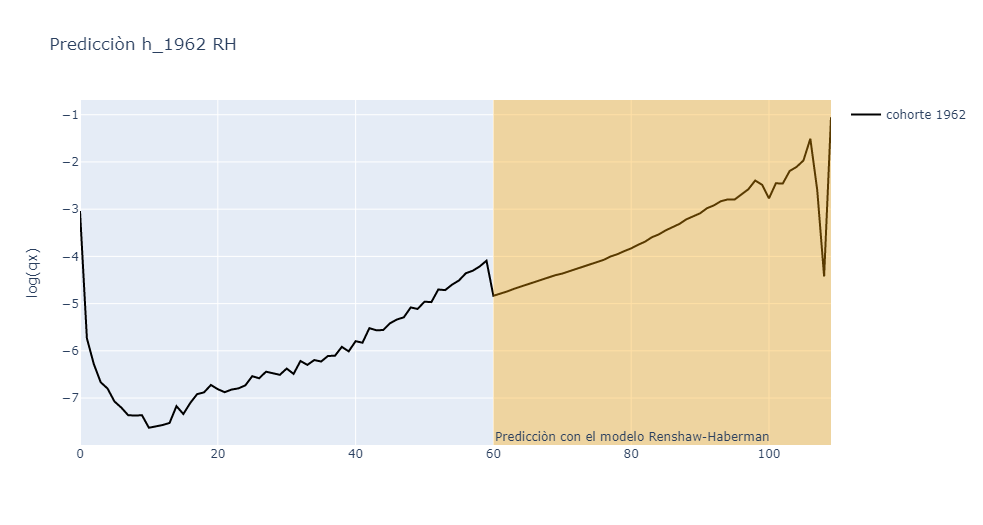

In [2]:
pa = r'C:\Users\Josè Valencia\Documenti\out_espa.csv'

TA61  = pd.read_csv(pa).x
#telma.BiometricModel().actuarialtable(TA61)

#### Tabla actuarial de la cohorte 1961 usando las PERM2020 (Hombres)

In [3]:
telma.BiometricModel().actuarialtable(TA61)

--------------------------------------------------
Actuarial Table of x:
--------------------------------------------------
Date and Time:  Sun, 06 Mar 2022 23:19:51
Region and Country:  Tokyo , JP
Omega ω :  120


,l(x),dx,qx,px,Lx,Tx,mx,ex curtate
0,100000.00000,1522.11191,0.015221,0.984779,99238.944045,8.594726e+06,0.015338,85.447260
1,98477.88809,91.28296,0.000927,0.999073,98432.246610,8.495487e+06,0.000927,85.767966
2,98386.60513,75.64524,0.000769,0.999231,98348.782510,8.397055e+06,0.000769,84.847541
3,98310.95989,62.33498,0.000634,0.999366,98279.792400,8.298706e+06,0.000634,83.912827
4,98248.62491,51.13638,0.000520,0.999480,98223.056720,8.200426e+06,0.000521,82.966066
...,...,...,...,...,...,...,...,...
116,0.23849,0.21096,0.884565,0.115435,0.133010,1.490750e-01,1.586046,0.125079
117,0.02753,0.02538,0.921903,0.078097,0.014840,1.606500e-02,1.710243,0.083545
118,0.00215,0.00200,0.930233,0.069767,0.001150,1.225000e-03,1.739130,0.069767
119,0.00015,0.00015,1.000000,0.000000,0.000075,7.500000e-05,2.000000,0.000000


In [59]:
w1 = r'C:\Users\Josè Valencia\Documents\LC_taula1961.txt'
l1 = pd.read_table(w1, delim_whitespace=True)*10
l1['LC'] = l1['lx']

In [58]:
w2 = r'C:\Users\Josè Valencia\Documents\RH_taula1961.txt'
l2 = pd.read_table(w2, delim_whitespace=True, index_col=0)*10
l2['RH'] = l2['lx']

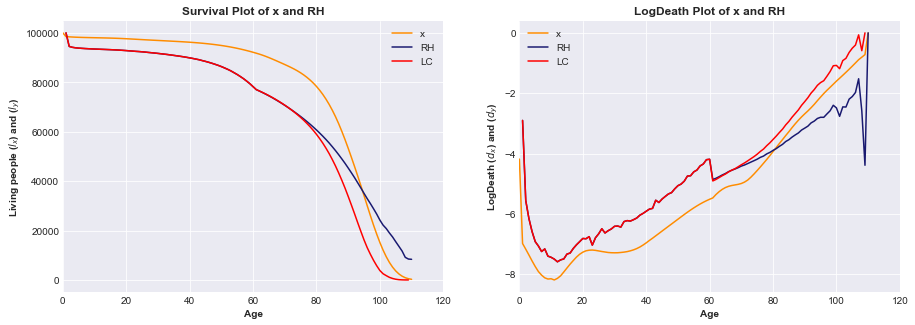

In [61]:
telma.MultipleLives().lifeplot_2(TA61.iloc[0:111],l2['RH'], l1['LC'], qx_log=True)

# Drawback de la Metodologia usada?


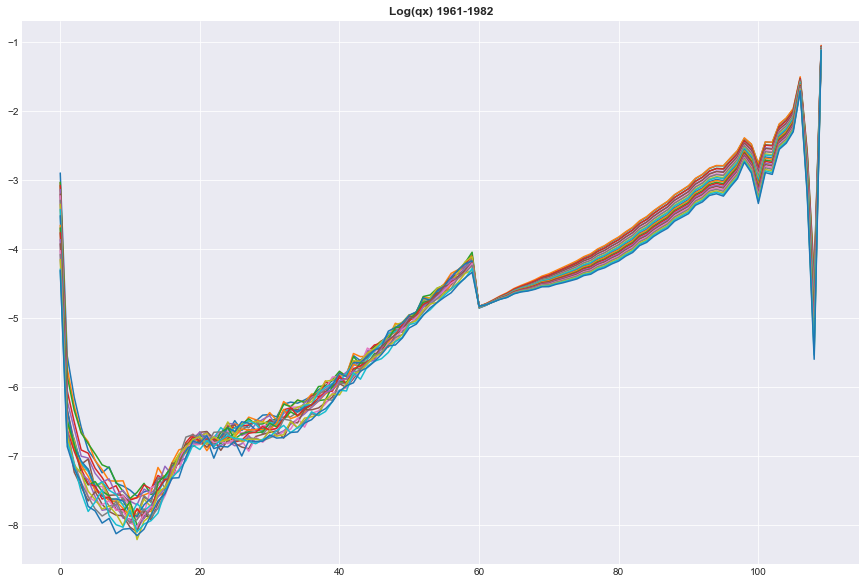

In [69]:
plt.figure(figsize=(15, 10))
plt.title('Log(qx) 1961-1982', fontweight='bold')
plt.plot(np.log(RH))
plt.show()